### Ski-kit Learn PCA Tutorial
https://www.jcchouinard.com/pca-with-python/#PCA_Examples_From_This_Tutorial

In [ ]:
import pandas as pd 
from sklearn import datasets
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis, PCA
# iris = datasets.load_iris()
 
# target_names = {
#     0:'setosa',
#     1:'versicolor', 
#     2:'virginica'
# }
 
# df = pd.DataFrame(
#     iris.data, 
#     columns=iris.feature_names
#     )
 
# df['target'] = iris.target
# df['target_names'] = df['target'].map(target_names)

In [ ]:
# load features and targets separately
iris = datasets.load_iris()
X = iris.data
# y = iris.target

In [ ]:
# data scaling
x_scaled = StandardScaler().fit_transform(X)
feature_names = iris["feature_names"]

In [ ]:
fa = FactorAnalysis(rotation="varimax", n_components=2).fit_transform(x_scaled)

In [ ]:
?FactorAnalysis

In [ ]:
pca = PCA(n_components=3)
 
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])

In [ ]:
pca.explained_variance_ # eigenvalue

## Tutorial from Kaggle
https://www.kaggle.com/code/gianinamariapetrascu/pca-varimax-rotation

In [1]:
# Modules, file paths, general set-up
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from factor_analyzer import FactorAnalyzer
from pyhere import here

plt.style.use("seaborn-darkgrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

path = {
    "dscr": here("data", "scratch"),
    "drpub": here("data", "raw", "public"),
    "drpriv": here("data", "raw", "private"),
    "ddpub": here("data", "derived", "public"),
    "ddpriv": here("data", "derived", "private"),
    "rfig": here("results", "figures"),
    "roth": here("results", "other"),
    "rtab": here("results", "tables")
}

In [2]:
# Read data
anime = pd.read_csv(here(path["dscr"], 'top250_anime.csv'))
anime.head()

,Rank,Title,Popularity,Genre,Studio,Type,Episodes,Duration,Start_date,End_date,Members,Score
0,1,Shingeki no Kyojin: The Final Season - Kankets...,609,"Action, Drama, Suspense",MAPPA,Special,2.0,61,23-Mar,2023,347875.0,9.17
1,2,Fullmetal Alchemist: Brotherhood,3,"Action, Adventure, Drama, Fantasy",Bones,TV,64.0,24,9-Apr,10-Jul,3109951.0,9.11
2,3,Bleach: Sennen Kessen-hen,508,"Action, Adventure, Fantasy",Pierrot,TV,13.0,24,22-Oct,22-Dec,404036.0,9.09
3,4,Steins;Gate,13,"Drama, Sci-Fi, Suspense",White Fox,TV,24.0,24,11-Apr,11-Sep,2393767.0,9.08
4,5,Gintama°,335,"Action, Comedy, Sci-Fi",Bandai Namco Pictures,TV,51.0,24,15-Apr,16-Mar,581994.0,9.07


In [4]:
# Drop missing data
anime = anime.dropna()

In [5]:
# Separate predictor from predicting vars (think the tutorial uses PCA as input in regression model)
y = anime['Score']
anime1 = anime.drop(['Score'], axis=1)

num_cols = [col for col in anime1.columns if anime1[col].dtype in ['int64','float64']]

In [6]:
# variance among numerircal features
var = anime1[num_cols].var()

# create DataFrame from variance values
var_df = pd.DataFrame({'Variance': var})

# print Variance DataFrame
var_df

,Variance
Rank,5.174420e+03
Popularity,9.001405e+05
Episodes,5.834239e+02
Duration,1.281889e+03
Members,4.642127e+11


In [7]:
# calculate coefficient of variation (CV)
cv = (anime1[num_cols].std() / anime1[num_cols].mean())*100

# create DataFrame from CV values
cv_df = pd.DataFrame({'CV': cv})

# print CV DataFrame
cv_df

,CV
Rank,57.726556
Popularity,115.566377
Episodes,134.189826
Duration,84.422578
Members,102.470629


### Principle Component Analysis

In [8]:
# Calculate Z-Scores
features = ['Rank','Popularity','Episodes','Duration','Members']

X = anime[features]

# normalizing features
X_norm = (X - X.mean(axis=0))/X.std(axis=0)
print("Shape of X_norm DataFrame:", X_norm.shape)

Shape of X_norm DataFrame: (244, 5)


In [9]:
# Calculate Z-Scores another way 
# Weird that it is slightly different here. I can actually see the equation in the former version, so I'll go with that instead
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(X)
x_scaled

array([[-1.72193541, -0.22387053, -0.66377312,  0.52029517, -0.46626478],
       [-1.70800509, -0.86391369,  1.90834773, -0.51524821,  3.59600604],
       [-1.69407478, -0.33054439, -0.2074291 , -0.51524821, -0.38366706],
       ...,
       [ 1.71885247,  0.76048627,  1.36903206, -0.51524821, -0.78614731],
       [ 1.73278278,  0.20704962, -0.2074291 , -0.54323587, -0.66358982],
       [ 1.7467131 ,  1.36356324,  2.53063503, -0.48726055, -0.85493634]])

In [10]:
# principal component analysis on features
pca = PCA()

# fit and transform X_norm to PCA dataframe
X_pca = pca.fit_transform(X_norm)

# converting to dataframe
names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pcadf = pd.DataFrame(X_pca, columns=names)
print("Shape of PCA DataFrame:", X_pcadf.shape)

Shape of PCA DataFrame: (244, 5)


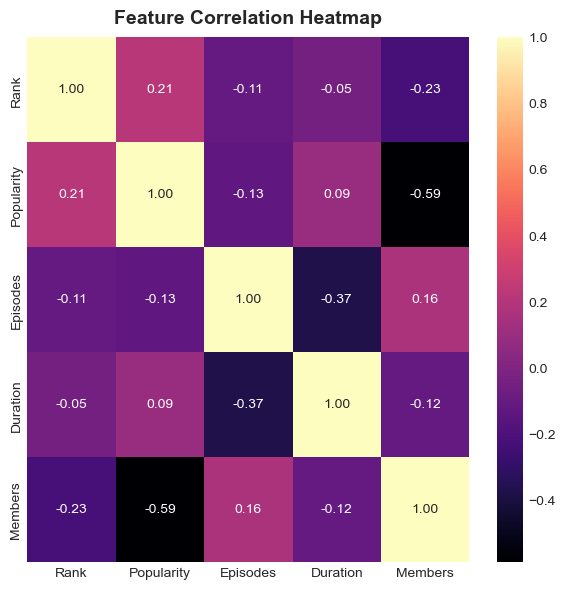

In [11]:
# create covariance matrix
corr_matrix = np.corrcoef(X_norm.T)

# create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, cmap='magma', annot=True, fmt='.2f',
            xticklabels=anime1[num_cols].columns, yticklabels=anime1[num_cols].columns)

# set plot title
plt.title('Feature Correlation Heatmap')

# show plot
plt.show()

In [12]:
# calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

# sort the eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]

# convert to dataframes
eigenvalues_df = pd.DataFrame({'Eigenvalue': eigenvalues}, index=anime1[num_cols].columns)
eigenvalues_df['Proportion'] = eigenvalues_df['Eigenvalue'] / eigenvalues_df['Eigenvalue'].sum()
eigenvalues_df['Cumulative Proportion'] = eigenvalues_df['Proportion'].cumsum()

# display dataframes
print("Eigenvalues:")
display(eigenvalues_df.style.format({'Eigenvalue': '{:.4f}', 'Proportion': '{:.4f}', 'Cumulative Proportion': '{:.4f}'}))

In [13]:
eigenvalues

array([1.85644444, 1.25947695, 0.88643725, 0.5881805 , 0.40946086])

In [ ]:
# plot scree plot
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='#8080ff')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

We can select the eigenvalues of at least 1 (Kaiser criterion I think?)

In [ ]:
evr = pca.explained_variance_ratio_
print(evr)
features = ['Rank', 'Popularity', 'Episodes', 'Duration', 'Members']

# plot the EVR using matplotlib pyplot    
plt.figure(figsize=(12,6))
sns.barplot(x=np.array(features), y=evr, color='#8080ff')
plt.xlabel("Components features")
plt.ylabel("%Explained variance ratio")
plt.show()

In [ ]:
evc = np.cumsum(pca.explained_variance_)
print(evc)

features = ['Rank', 'Popularity', 'Episodes', 'Duration', 'Members']

plt.figure(figsize=(12,6))
sns.lineplot(x=np.array(features), y=evc, color='#8080ff')
plt.xlabel("Components features")
plt.ylabel("Cummulative explained variance")
plt.ylim(1,6)
plt.show;

In [ ]:
loadings = pd.DataFrame(pca.components_.T[:,:2], index=np.array(features), columns=names[:2])
loadings

### Varimax Rotation

In [ ]:
features = ['Rank', 'Popularity', 'Episodes', 'Duration', 'Members']
X = anime1[features]

# normalizing features
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

# fit factor analyzer with principal components and varimax rotation
fa = FactorAnalyzer(rotation="varimax", n_factors=2, method='principal')
fa.fit(X_norm)

# get the rotated factor pattern
loadings2 = pd.DataFrame(fa.loadings_, index=X_norm.columns, columns=[f"Factor{i+1}" for i in range(2)])
rotated_factor_pattern = loadings2[abs(loadings2) >= 0.4].dropna(how='all')
loadings2
# # why did they declare any loading less than 0.4 as not needed in that factor? 
# # what does it mean for a loading of an entry of a vector to be NaN?

# # display the results
# loadings2
# # rotated_factor_pattern

## Other Software Options, Links...
https://pypi.org/project/advanced-pca/

https://github.com/bmcmenamin/fa_kit

https://github.com/scikit-learn/scikit-learn/issues/2688

In [ ]:
pip install advanced-pca